In [1]:
import numpy as np
from scipy import io
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# see https://github.com/anlthms/sp-2016/blob/master/prep.py

In [13]:
mat = io.loadmat('/datasets/kaggle/mls/train_1/1_1000_0.mat')

In [14]:
sampling_rate = int(mat['dataStruct'][0, 0][1][0, 0])
n_samples = int(mat['dataStruct'][0, 0][2][0, 0])
ch_indexes = np.int8(mat['dataStruct'][0, 0][3][0])

In [15]:
sampling_rate, n_samples, ch_indexes

(400,
 240000,
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16], dtype=int8))

In [16]:
data = mat['dataStruct'][0, 0][0].T

In [17]:
waves = np.zeros([len(ch_indexes), n_samples], dtype=np.float32)

In [18]:
for i in range(len(ch_indexes)):
    waves[i] = data[ch_indexes[i] - 1]

In [19]:
np.max(waves, axis=0)

array([ 43.95537567,  45.04854965,  47.04854965, ...,  81.64745331,
        80.64745331,  84.64745331], dtype=float32)

In [10]:
waves[0].shape

(240000,)

In [11]:
mn = dat.min()
mx = dat.max()

NameError: name 'dat' is not defined

In [9]:
mx = float(max(abs(mx), abs(mn)))
if mx != 0: dat *= 0x7FFF / mx
dat = np.int16(dat)

In [10]:
dat.shape

(240000, 16)

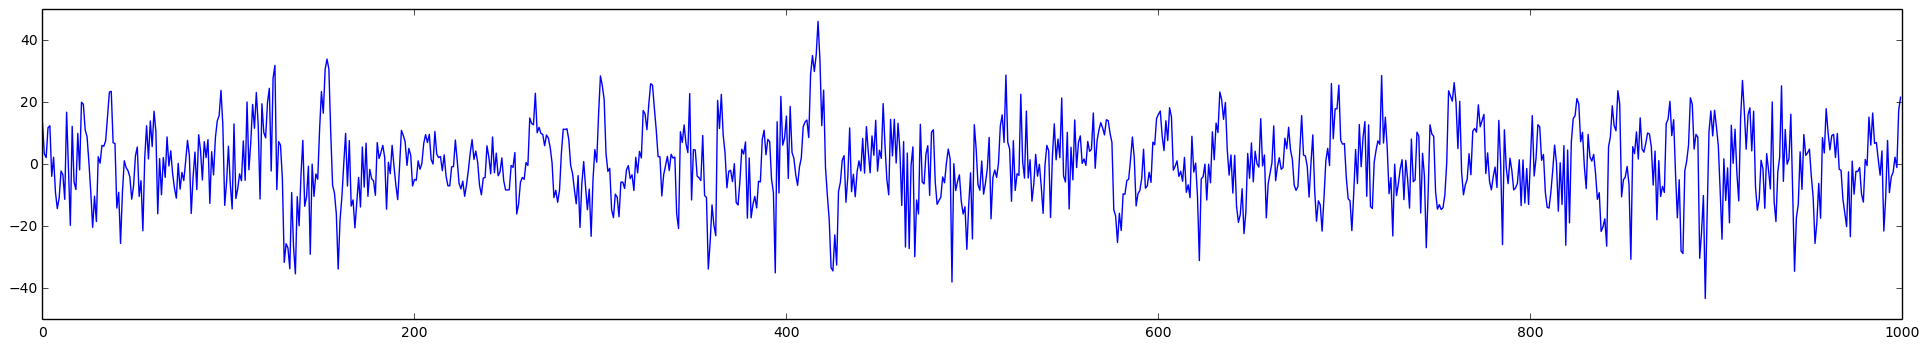

In [57]:
x = signal.resample(waves[0], 1000)
plt.figure(figsize=(24,4))
plt.plot(x)

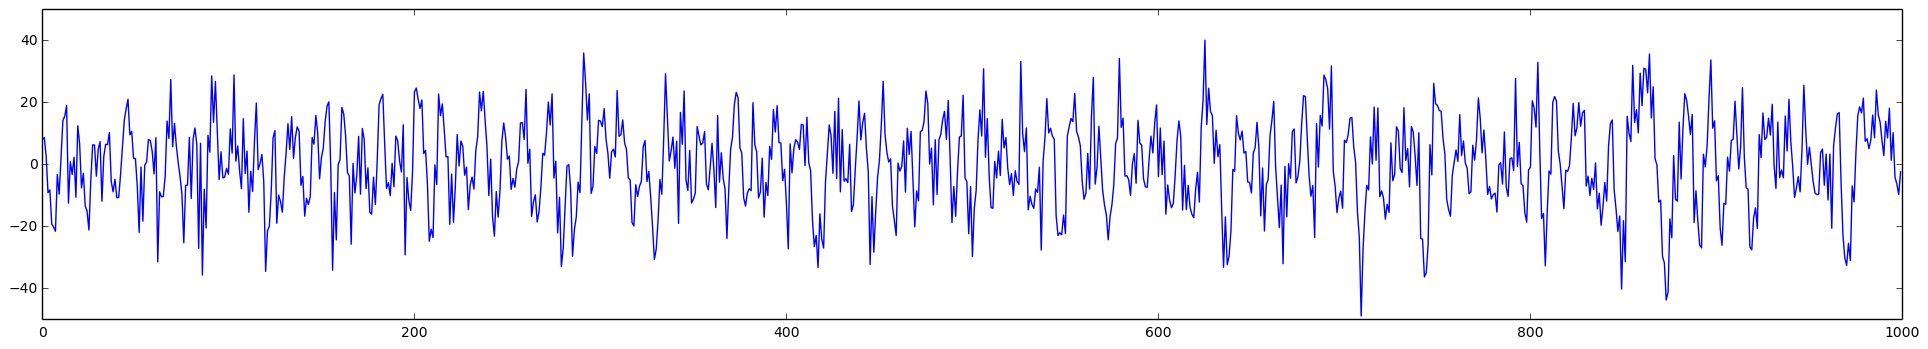

In [60]:
x = signal.resample(waves[1], 1000)
plt.figure(figsize=(24,4))
plt.plot(x)

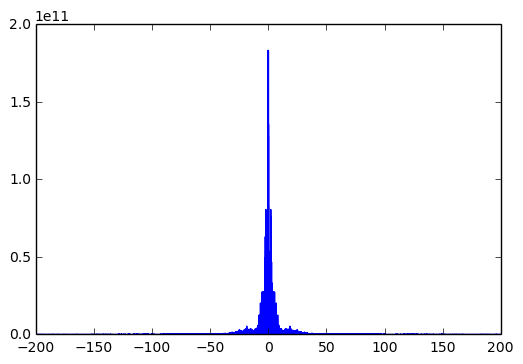

In [65]:
ps = np.abs(np.fft.fft(waves[0]))**2

time_step = 1. / 400.
freqs = np.fft.fftfreq(waves[0].size, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])

In [59]:
# todo:
# - normalize (across all training/test files)
# - subtract mean
# - read about relevant time intervals

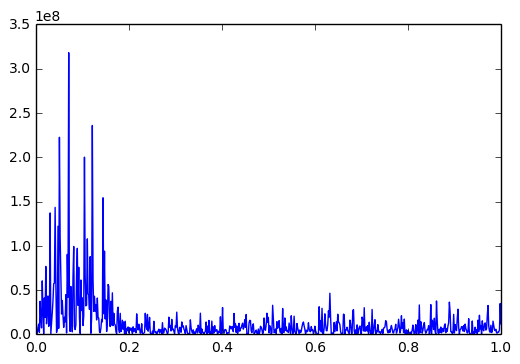

In [86]:
s = signal.resample(waves[0], 10000)
fs = 400.0/26
t = np.arange(0,10,1/fs)
x = np.cos(2*np.pi*10*t)

xF = np.fft.fft(s)
N = len(xF)
xF = xF[0:N/2]
fr = np.linspace(0,fs/2,N/2)

# plt.ion()
plt.xlim((0,1))
plt.plot(fr,abs(xF)**2)

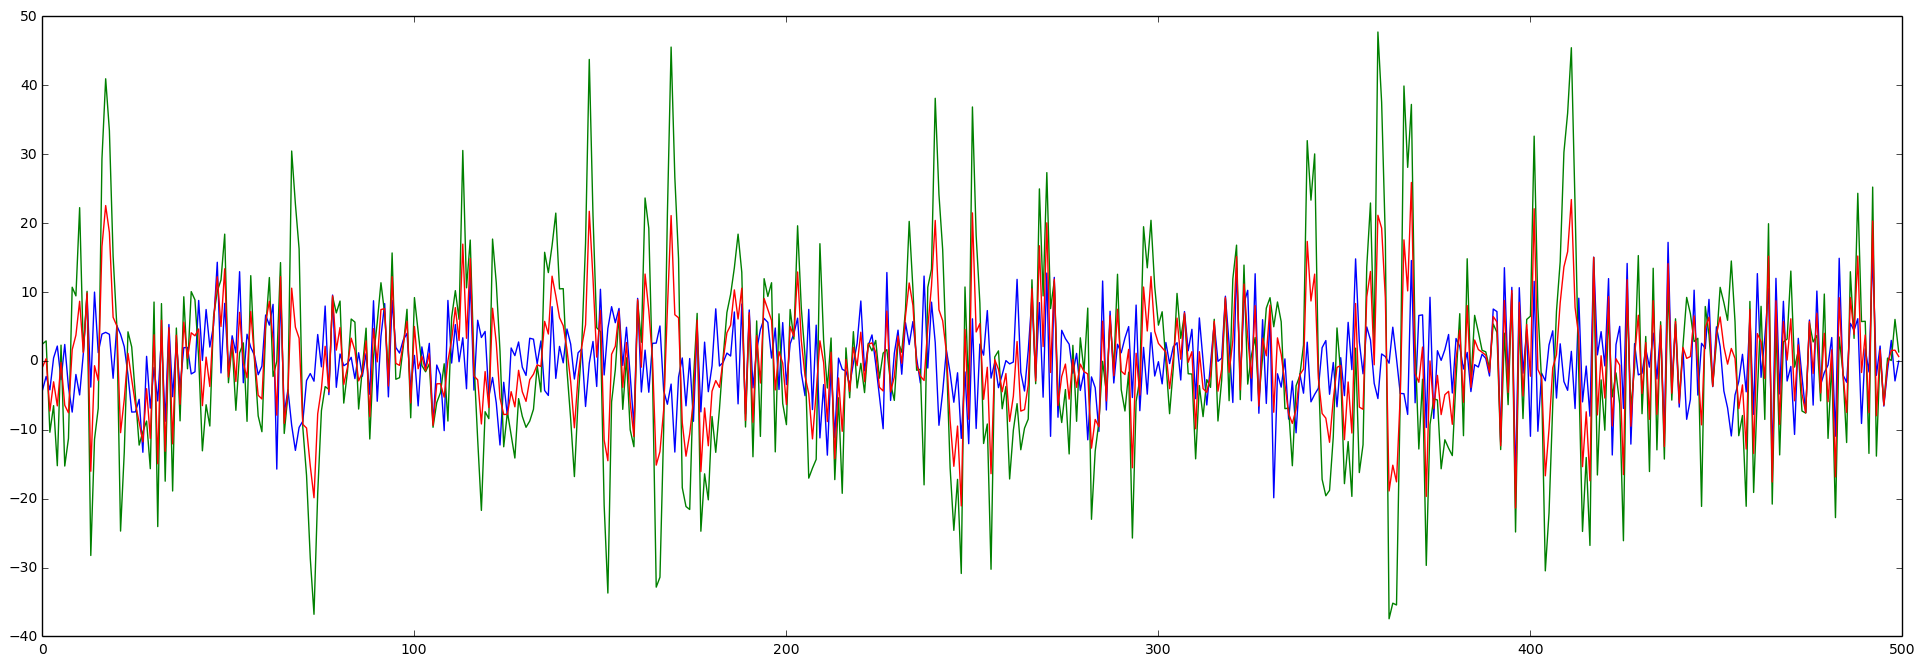

In [22]:
plt.figure(figsize=(24,8))
plt.plot(signal.resample(waves[0], 500))
plt.plot(signal.resample(waves[1], 500))
avg = np.multiply(np.sum(waves[:2], axis=0), 1./2.)
plt.plot(signal.resample(avg, 500))

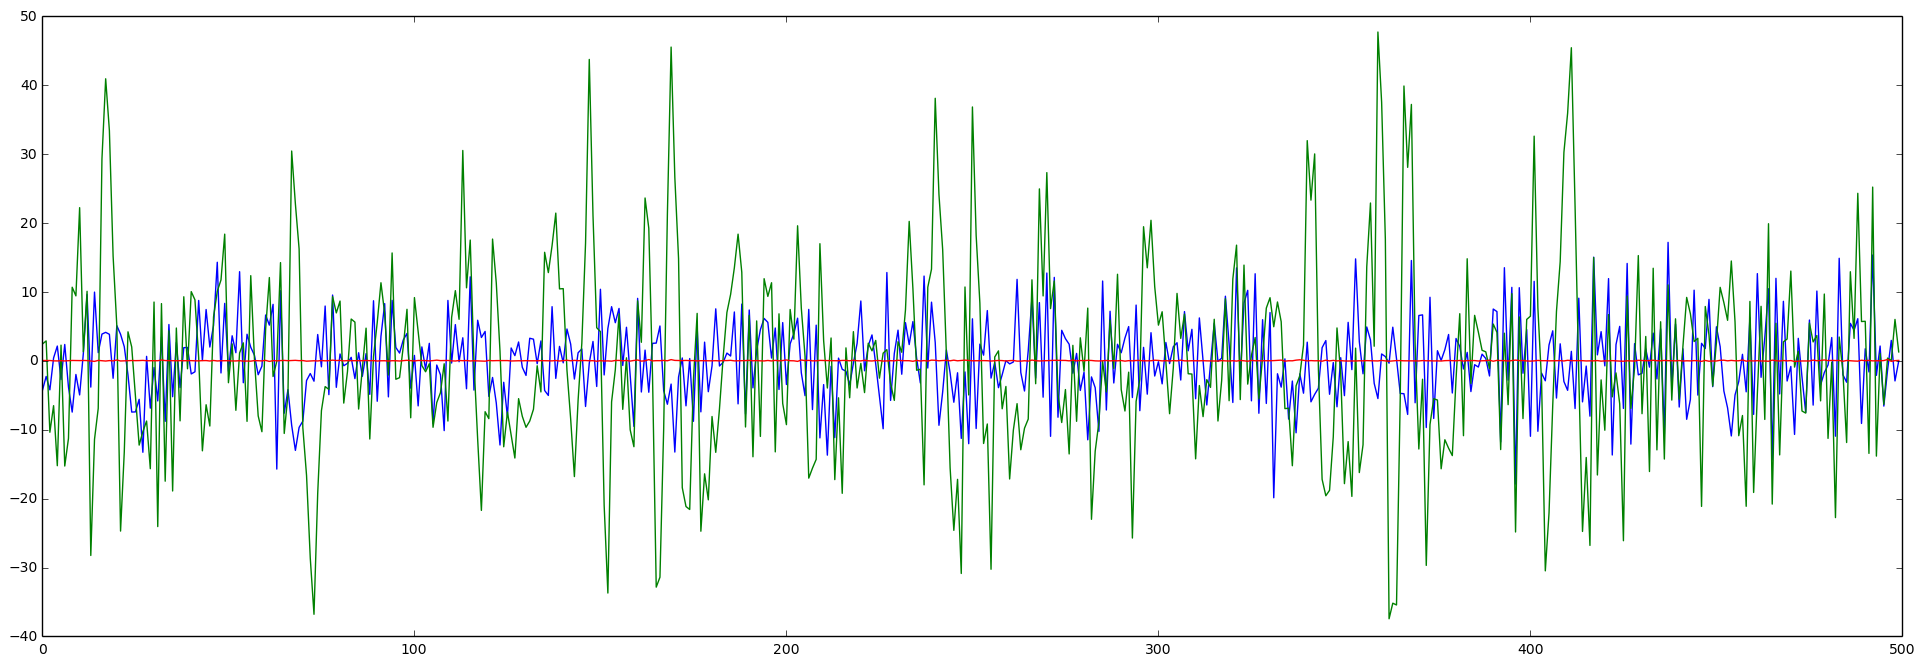

In [24]:
plt.figure(figsize=(24,8))
plt.plot(signal.resample(waves[0], 500))
plt.plot(signal.resample(waves[1], 500))
avg = np.divide(np.sum(waves, axis=0), 16.)
plt.plot(signal.resample(avg, 500))